### Lista computacional: Modelos aproximados
Aluna: Ana Lu Tan

In [ ]:
using Plots, Random, LinearAlgebra, CSV, DataFrames, Plots, Dates

### Exercício E1

### a) Gere aleatoriamente 30 pontos de um polinômio de grau 5.

Vamos considerar o polinômio $$p(x) = x^5 + 5 x^4 + x^3 + 0.5 x^2 + 2 x + 6$$

Com isso, geramos pontos aleatórios adicionando um ruído aos valores da função. No nosso caso, esse ruído é dado por $$1000000 * randn()$$ Onde a função $randn()$ produz números aleatórios com distribuição normal padrão e é escalonado por um fator de 1000000.

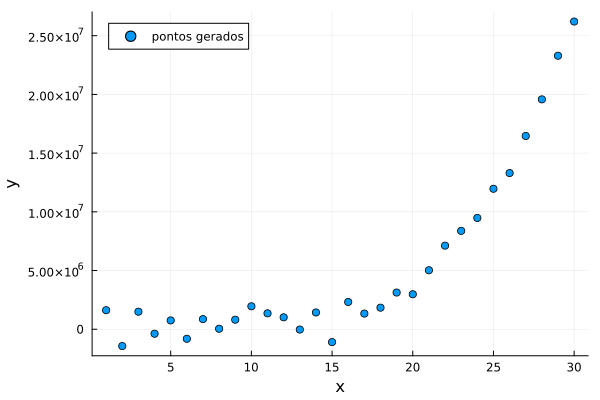

In [ ]:
# função polinomial usada
p(x) = x^5 + 5 * x^4 + x^3 + 0.5 * x^2 + 2 * x + 6

# gerando os pontos
pontos = []

for i in 1:30
    x = i
    y = p(x) + 1000000 * randn()
    push!(pontos, (x, y))
end

x_coords = [p[1] for p in pontos]
y_coords = [p[2] for p in pontos]

scatter(x_coords, y_coords, label="pontos gerados", xlabel="x", ylabel="y")

### b) Faça regressão polinomial com polinômios de grau 0 até 29.



Considere um conjunto de pontos `(x1, y1), (x2, y2), ..., (xn, yn)`. Ao fazer regressão polinomial, achamos os coeficientes do polinômio que minimiza o erro de todos os pontos.

Considerando um exemplo simples, em que fazemos regressão linear, teremos:

$$ax_1 + b = y_1 \\
ax_2 + b = y_2\\
...\\
ax_n + b = y_n$$

Esse sistema de equações podem ser reescritas na forma matricial $Ax = b$:

$$
\begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
\vdots & \vdots \\
x_n & 1
\end{bmatrix}
\begin{bmatrix}
a \\
b \\
\end{bmatrix}
=
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
$$

Porém, como o sistema é impossível (temos mais equações do que variáveis), aplicamos um algoritmo que vimos em sala: em vez de realizarmos $Ax = b$, fazemos uma aproximação $Ax \approx b$. Com isso, para chegarmos à solução e descobrirmos os coeficientes que compõem o vetor x, basta resolver a equação normal $A^{T}Ax = A^{T}b$. \\
Esse mesmo método pode ser usado com polinômios de diferentes graus (0, 1, 2, 3...), portanto, nosso código funcionará para a tarefa proposta.

> **OBS:** além do método acima, é possível encontrar a "fórmula geral" por meio do cálculo do erro quadrático e derivadas parciais. Fiz algumas notas manualmente testando para polinômios de grau 1, 2 e 3, e acabei achando um padrão que se repete. [Link das notas](https://drive.google.com/file/d/1j5Ic8wroaa7E7FbY2I9HGBVsjy3Wbol_/view?usp=drive_link)

In [ ]:
function regressao_polinomial(x, y, grau)
    A = zeros(length(x), grau + 1)

    for i in 1:length(x)
       for j in 1:grau+1
            A[i, j] = x[i]^(grau + 1 - j)
       end

    end

    # montando matriz b
    b = y

    # resolvendo por minimos quadrados (A^T * A * x = A^T * b)
    coef = (A' * A) \ (A' * b)

    return coef
end


function calcular_valores(x, y, grau)
    coef = regressao_polinomial(x, y, grau)

    y_preditos = zeros(length(x))

    for i in 1:length(x)
        for j in 1:length(coef)
            exp = grau + 1 - j
            y_preditos[i] += coef[j] * x[i]^exp
        end
    end

    return y_preditos
end


function plotar_grafico(x, y, grau)
    coef = regressao_polinomial(x, y, grau)

    x_min, x_max = minimum(x), maximum(x)
    x_curva = range(x_min, x_max, length=30)

    y_curva = calcular_valores(x, y, grau)

    grafico = scatter(x, y, label="pontos gerados",
                      xlabel="x", ylabel="y",
                      title="regressão polinomial (grau $grau)")

    plot!(grafico, x_curva, y_curva, label="regressão", linewidth=2)
    return grafico
end

plotar_grafico (generic function with 1 method)

####testes da função

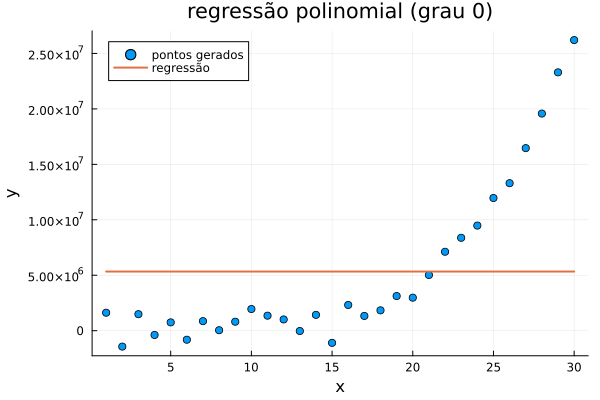

In [ ]:
plotar_grafico(x_coords, y_coords, 0)

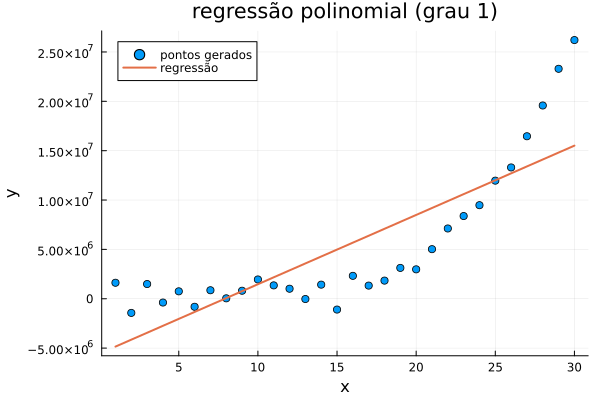

In [ ]:
plotar_grafico(x_coords, y_coords, 1)

A curva usando polinômios de graus 0 e 1 são um tanto quanto monótonos... Com uma rápida olhada podemos perceber que o erro está bem grande (em geral, os pontos estão bem afastados da curva gerada). Porém, observando o gráfico de regressão polinomial com grau 2, podemos ver que os pontos formam um formato parecido com uma parábola (o que justifica o erro quadrático ter uma queda abrupta - mais detalhes na [alternativa D](#scrollTo=BbuDuzhoGNQK).

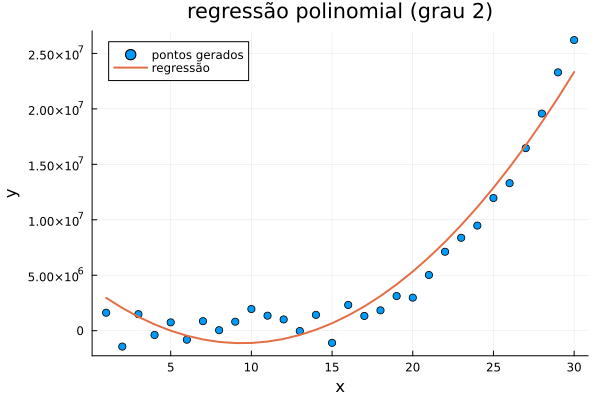

In [ ]:
plotar_grafico(x_coords, y_coords, 2)

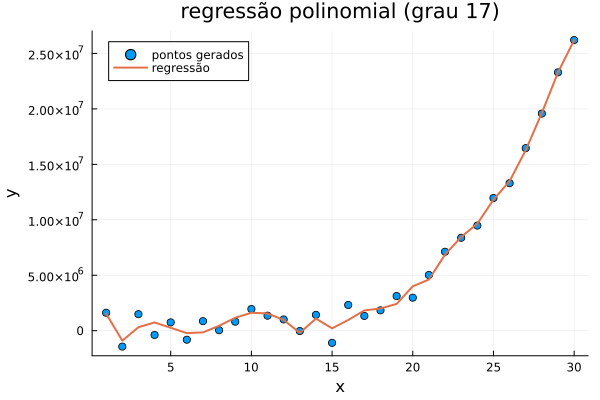

In [ ]:
plotar_grafico(x_coords, y_coords, 17)

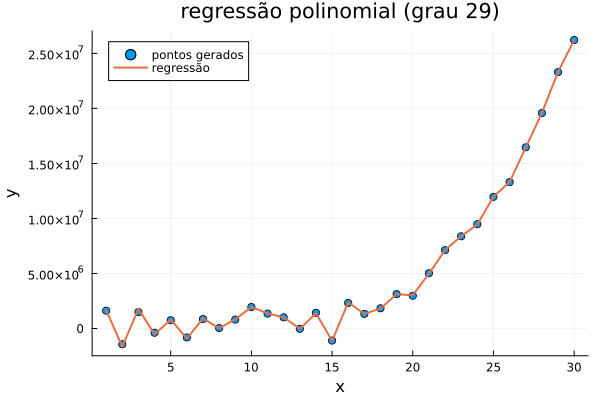

In [ ]:
plotar_grafico(x_coords, y_coords, 29)

Para os polinômios gerados pela regressão polinomial de graus acima de 2 ocorreu o esperado: a curva se ajustou cada vez mais conforme o grau aumentou. Até que no grau 29 ocorreu a interpolação.

### c) É possível fazer a regressão com um polinômio de grau maior que 29? Justique.

Não é possível realizar regressão polinomial com polinômio de grau maior que 29 com apenas 30 pontos diferentes. Isso porque um polinômio de grau $n$ possui $n+1$ coeficientes. Assim, quando realizamos regressão, estamos essencialmente resolvendo um sistema de equações para determinar os coeficientes da curva que melhor se ajusta aos pontos. Com 30 pontos, formamos no máximo 30 equações independentes. \\

Vamos analisar os casos possíveis: \\

**1) Polinômio de grau menor que 29** \\
Nesse caso, o número de coeficientes é menor que a quantidade de pontos. Com isso, o sistema passa a ser impossível. Porém, a regressão busca minimizar o erro quadrático. Esse ajuste tem solução única, pois há uma única curva que representa o "melhor ajuste". \\

**2) Polinômio de grau 29** \\
Com 30 pontos acharemos um sistema de 30 equações e 30 incógnitas. Como esperado, isso resulta em uma solução única, e o polinômio irá interpolar todos os pontos. \\

**3) Polinômio de grau maior que 29** \\
Teremos um sistema com mais incógnitas do que equações. Logo, o sistema será indeterminado. Ele terá infinitas soluções.


### d) Faça o plot do erro total (eixo y) por grau (eixo x). O que se pode dizer desse gráfico conforme o grau aumenta? Era o que você esperava? Por quê?

In [ ]:
# calculando erro para cada polinomio

function calcular_erro(x, y, grau_min, grau_max)
    graus = grau_min:grau_max
    erros = []

    for i in graus
        y_preditos = calcular_valores(x, y, i)

        # calculando o erro quadrático
        erro_quadratico = sum((y - y_preditos).^2)
        push!(erros, erro_quadratico)
    end

    plot(graus, erros, label="erro quadrático",
        xlabel="grau do polinômio",
        ylabel="erro total",
        seriestype=:line, marker=:circle)

end

calcular_erro (generic function with 1 method)

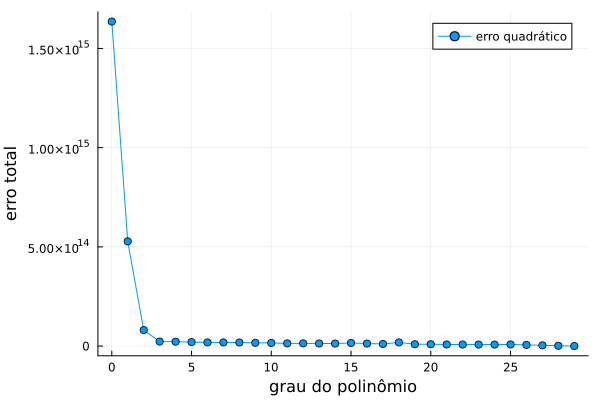

In [ ]:
calcular_erro(x_coords, y_coords, 0, 29)

Como esperado, o erro diminui conforme o grau aumenta. Isso acontece pois quanto maior o grau, mais coeficientes temos para deixar a curva mais "flexível" e deixar mais ajustada aos 30 pontos que temos, até chegar ao grau 29, em que vai ocorrer uma interpolação e o erro vai idealmente chegar a 0.

Vamos ampliar nosso gráfico para analisarmos melhor.

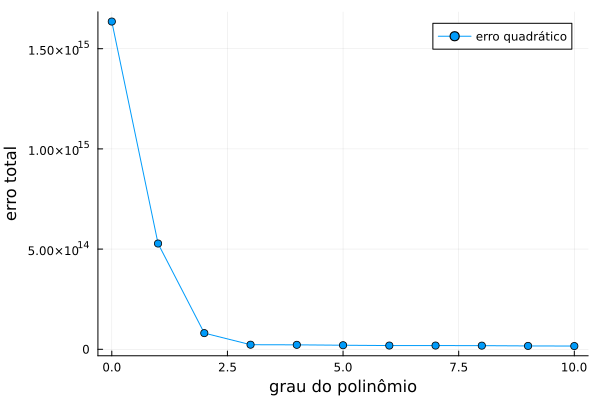

In [ ]:
calcular_erro(x_coords, y_coords, 0, 10)

Nesse caso, ampliamos nosso gráfico para visualizar os erros em função dos graus 0 até 10. \\
Podemos chegar em conclusões importantes sobre alguns pontos: \\
Antes de a regressão assumir grau 2, notamos um erro grande, são pontos que chamamos de `underfit` \\
Quando a regressão assume grau 2, o gráfico tem uma queda abrupta, é chamado `cotovelo da curva` \\
Depois disso (graus 3 em diante) o erro assume quase um valor constante, não temos grandes mudanças, chamamos de `overfit`

De fato, se voltarmos para a [sessão de testes da função](#scrollTo=rdDf_ezJX9rb) e avaliarmos a curva que a regressão polinomial nos dá, a partir de grau 2 podemos ver que a parábola assume um formato bem parecido com o conjunto de pontos.

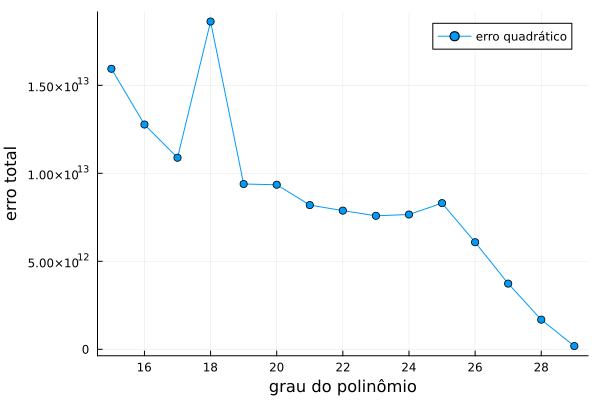

In [ ]:
calcular_erro(x_coords, y_coords, 15, 29)

Nesse caso, ampliamos nosso gráfico para visualizarmos erros em função dos graus 15 até 29. \\
Podemos notar que, assim como esperado, o erro diminui conforme o grau aumenta. Porém, quando atinge o grau 17, há um "pico" inesperado. Isso ocorre por conta dos erros acumulados do algoritmo, já que por se tratar de uma tarefa computacional e estamos trabalhando com números do tipo float, certamente há truncamentos durante os cálculos, resultando no acúmulo de erros.

### Exercício E2

#### Determine um ranking dos filmes preferidos dos 13 alunos usando mínimos quadrados em Julia.

Após transformar as comparações obtidas nas votações em equações, podemos escrevê-las como um sistema de equações lineares:

\begin{cases}
T - R = 11 \\
V - C = 3 \\
O - D = 7 \\
B - H = 2 \\
S - D = 9 \\
H - R = 7 \\
T - V = 5 \\
O - H = 5 \\
C - D = 2 \\
V - D = 2 \\
S - R = 11 \\
O - B = 5 \\
T - B = 3 \\
O - C = 7
\end{cases}

Observe que há mais equações do que incógnitas, ou seja, temos um sistema impossível. Logo, não há solução que satisfaça todas as comparações ao mesmo tempo. Vamos achar uma solução aproximada para o nosso problema por meio do método dos **mínimos quadrados**.

Primeiramente, escrevemos nosso sistema na seguinte forma:

\begin{cases}
T - R \approx 11 \\
V - C \approx 3 \\
... \\
O - C \approx 7
\end{cases}

E calculamos a solução que minimiza a função erro, dada por

$$ E(x) = distância^2(Ax, b)$$

Para isso, resolvemos a equação normal $$A^{\mathsf{T}} A \tilde{x} = A^{\mathsf{T}} b$$

A partir dessa solução, o vetor $\tilde{x}$ vai nos dar a pontuação dos filmes e o ranking deles.

> **OBS:** Como nosso sistema possui apenas relações entre filmes, cada incógnita pode assumir vários valores de forma que essas relações são satisfeitas. Para nosso algoritmo dar certo, precisamos fixar um valor para determinada incógnita. No nosso caso, vamos considerar $R = 0$.

In [ ]:
A = [
    1  -1   0   0   0   0   0   0   0;
    0   0   0  -1   0   0   0   0   1;
    0   0   -1  0   1   0   0   0   0;
    0   0   0   0   0   1  -1   0   0;
    0   0   -1  0   0   0   0   1   0;
    0  -1   0   0   0   0   1   0   0;
    1   0   0   0   0   0   0   0  -1;
    0   0   0   0   1   0  -1   0   0;
    0   0  -1   1   0   0   0   0   0;
    0   0  -1   0   0   0   0   0   1;
    0  -1   0   0   0   0   0   1   0;
    0   0   0   0   1  -1   0   0   0;
    1   0   0   0   0  -1   0   0   0;
    0   0   0  -1   1   0   0   0   0;
    0   1   0   0   0   0   0   0   0
]

x = zeros(9)

b = [11, 3, 7, 2, 9, 7, 5, 5, 2, 2, 11, 5, 3, 7, 0]

ATA = A' * A
ATb = A' * b

x = ATA \ ATb

T, R, D, C, O, B, H, S, V = x[1], x[2], x[3], x[4], x[5], x[6], x[7], x[8], x[9]

filmes = [
    "Toy story",
    "Rocky",
    "Duna",
    "Curtindo a vida adoidado",
    "Os incriveis",
    "Batman begins",
    "Harry Potter",
    "Shrek",
    "De volta para o futuro"
]

pontuacao = Dict(filmes[i] => x[i] for i in 1:9)

ranking = sort(collect(pontuacao), by = par -> par[2], rev = true)

println("ranking e pontuação dos filmes: ")
for (i, (nome, pontos)) in enumerate(ranking)
    println("$i. $nome = $(round(pontos, digits=4))")
end

ranking e pontuação dos filmes: 
1. Shrek = 11.724
2. Os incriveis = 11.4326
3. Toy story = 10.9419
4. Batman begins = 7.5696
5. Harry Potter = 6.3341
6. De volta para o futuro = 6.2563
7. Curtindo a vida adoidado = 4.379
8. Duna = 3.448
9. Rocky = 0.0


### Exercício E3

Um professor se pesou em diversos dias dos últimos meses e anotou suas medições em uma planilha. Usando regressão, em Julia, aproxime em que dia o professor estará pesando 110 kg.

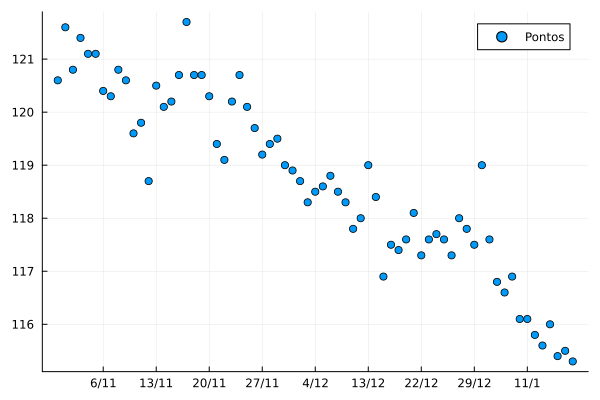

In [ ]:
df = CSV.File("/content/data.csv") |> DataFrame

scatter(df.Data, df."Peso (kg)", label="Pontos")

Como o comportamento dos pontos tem um formato parecido com uma função linear, vamos realizar a **regressão linear** para aproximar o dia em que o professor estará pesando 110 kg

In [ ]:
# adicionar a coluna de "ano" ao dataset (importante para a contagem de dias)
df.ano = map(x -> parse(Int, split(x, "/")[2]) < 10 ? 2025 : 2024, df.Data)
df.data_completa = map(i -> Date(df.ano[i], parse(Int, split(df.Data[i], "/")[2]), parse(Int, split(df.Data[i], "/")[1])), 1:nrow(df))

# convertendo data completa em números de dias
data_inicial = minimum(df.data_completa)
df.dias = map(d -> (d - data_inicial).value + 1, df.data_completa)
print(df)

69×5 DataFrame
 Row │ Data     Peso (kg)  ano    data_completa  dias
     │ String7  Float64    Int64  Date           Int64
─────┼─────────────────────────────────────────────────
   1 │ 26/10        120.6   2024  2024-10-26         1
   2 │ 27/10        121.6   2024  2024-10-27         2
   3 │ 28/10        120.8   2024  2024-10-28         3
   4 │ 29/10        121.4   2024  2024-10-29         4
   5 │ 30/10        121.1   2024  2024-10-30         5
   6 │ 5/11         121.1   2024  2024-11-05        11
   7 │ 6/11         120.4   2024  2024-11-06        12
   8 │ 7/11         120.3   2024  2024-11-07        13
   9 │ 8/11         120.8   2024  2024-11-08        14
  10 │ 9/11         120.6   2024  2024-11-09        15
  11 │ 10/11        119.6   2024  2024-11-10        16
  12 │ 11/11        119.8   2024  2024-11-11        17
  13 │ 12/11        118.7   2024  2024-11-12        18
  14 │ 13/11        120.5   2024  2024-11-13        19
  15 │ 14/11        120.1   2024  2024-11-14      

os parâmetros encontrados para achar a reta que minimiza o erro: a = -0.06647150089703435 e b = 121.51735316111086 



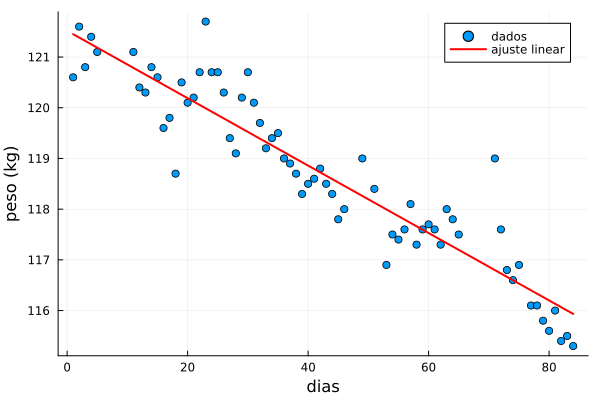

In [ ]:
# função erro
function E(a, b)
    return sum(((a * x[i] + b) - y[i])^2 for i in 1:length(x))
end

# calculando regressão linear para achar parâmetros (a, b)
y = df."Peso (kg)"
x = df.dias

n = length(x)

M = [sum(x .^ 2) sum(x);
     sum(x) n]

z = [sum(x .* y);
     sum(y)]

v = M \ z

a, b = v[1], v[2]

y_ajuste = a .* x .+ b

println("os parâmetros encontrados para achar a reta que minimiza o erro: a = $a e b = $b \n")
scatter(x, y, label="dados", xlabel="dias", ylabel="peso (kg)")
plot!(x, y_ajuste, label="ajuste linear", linewidth=2, color=:red)

In [ ]:
# agora que temos os parâmetros da reta que melhor que descreve o comportamento do peso em função dos dias, podemos achar o valor para quando y = 110

x_desejado = round(Int, (110 - b) / a)

dias_para_adicionar = x_desejado - 1
data_final = data_inicial + Day(dias_para_adicionar)

println("a data estimada em que o professor atingirá 110 kg será ", data_final)

a data estimada em que o professor atingirá 110 kg será 2025-04-16


In [ ]:
# nesse momento, como nosso erro está na unidade de kg^2, vamos calcular o erro quadrático médio para acharmos o erro em kg
E(a, b)/length(x)

0.3694840322101482

Como o erro que achamos é pequeno (aproximadamento 0,36), acredito que seja uma aproximação válida.